# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('../data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [10]:
assert df.shape == (1460, 80)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

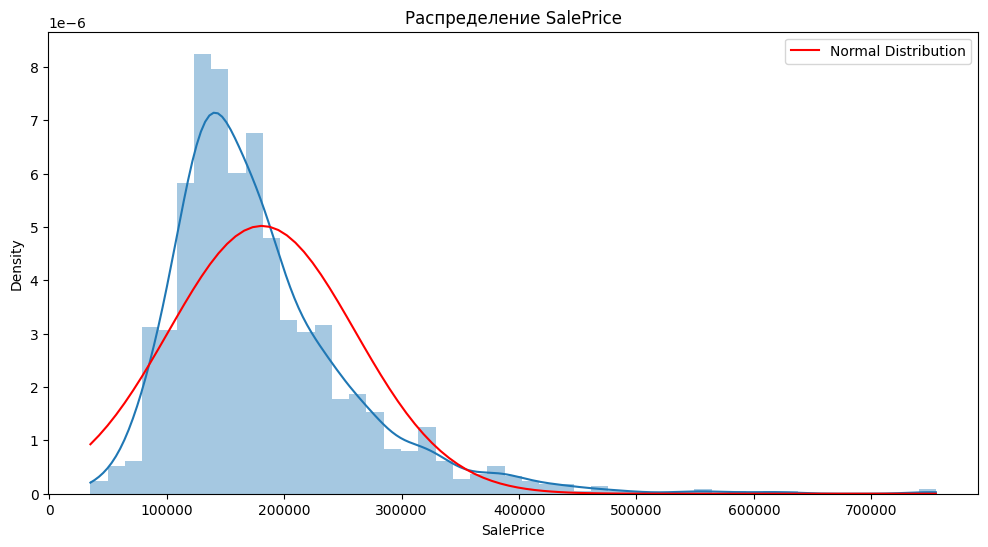

Коэффициент эксцесса: 9.51


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, stat='density', linewidth=0, alpha=0.4)
sns.lineplot(x=np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100),
             y=stats.norm.pdf(np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100),
                              df['SalePrice'].mean(), df['SalePrice'].std()),
             color='red', label='Normal Distribution')
plt.title('Распределение SalePrice')
plt.show()

print(f"Коэффициент эксцесса: {stats.kurtosis(df['SalePrice'], fisher=False):.2f}")

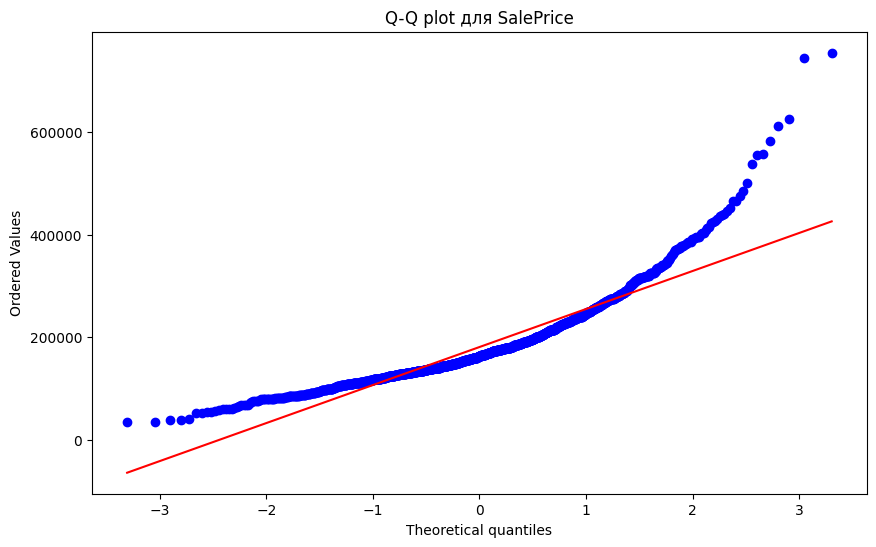

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(df['SalePrice'], plot=ax)
plt.title('Q-Q plot для SalePrice')
plt.show()

**Вывод:** Точки отклоняются от прямой в верхней части графика, что подтверждает правый хвост. Выборка не нормальна.

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

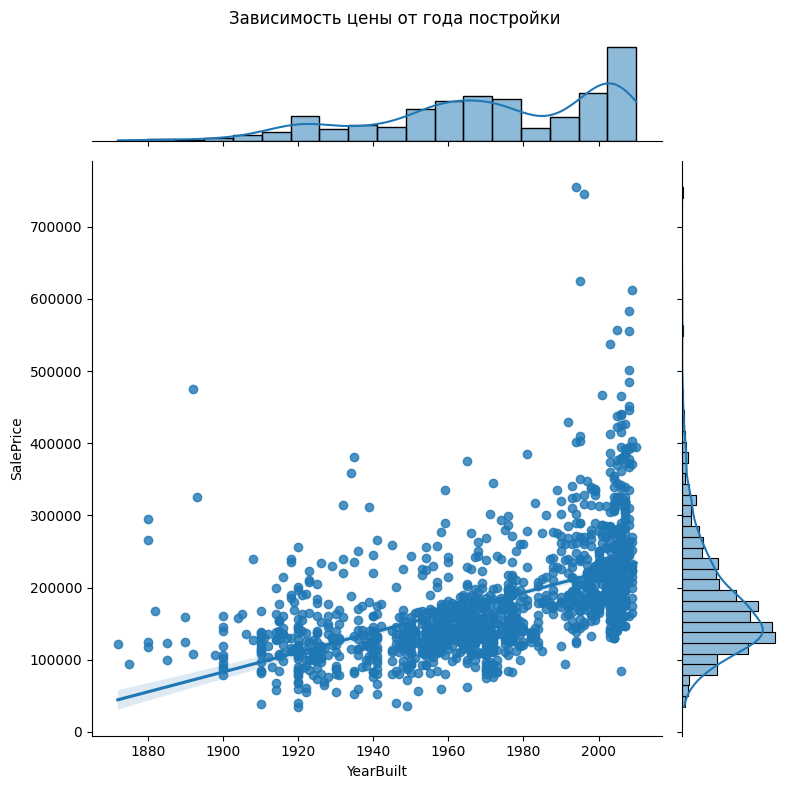

In [14]:
sns.jointplot(x='YearBuilt', y='SalePrice', data=df, kind='reg', height=8)
plt.suptitle('Зависимость цены от года постройки')
plt.tight_layout()


Text(0.5, 1.0, 'Качество материалов vs Цена')

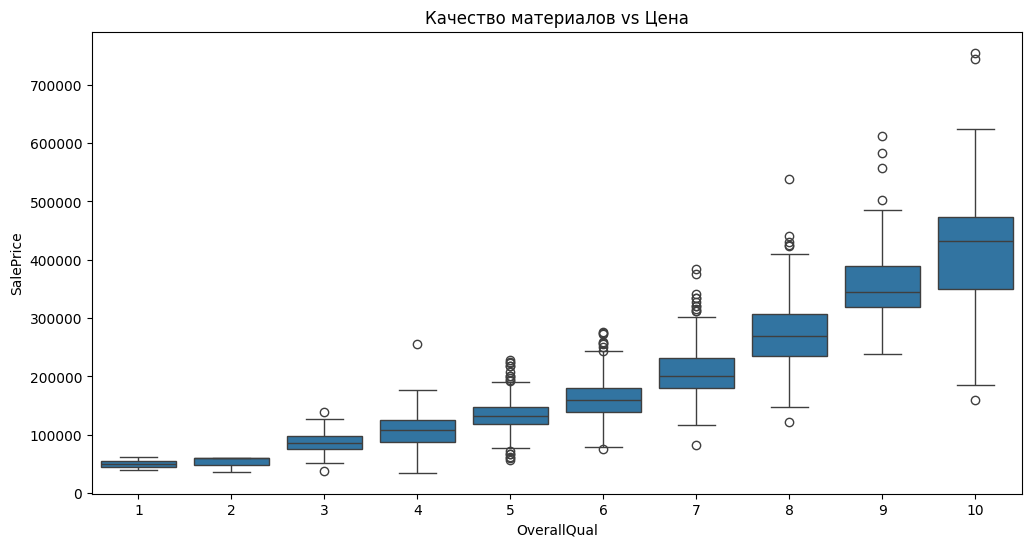

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Качество материалов vs Цена')

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

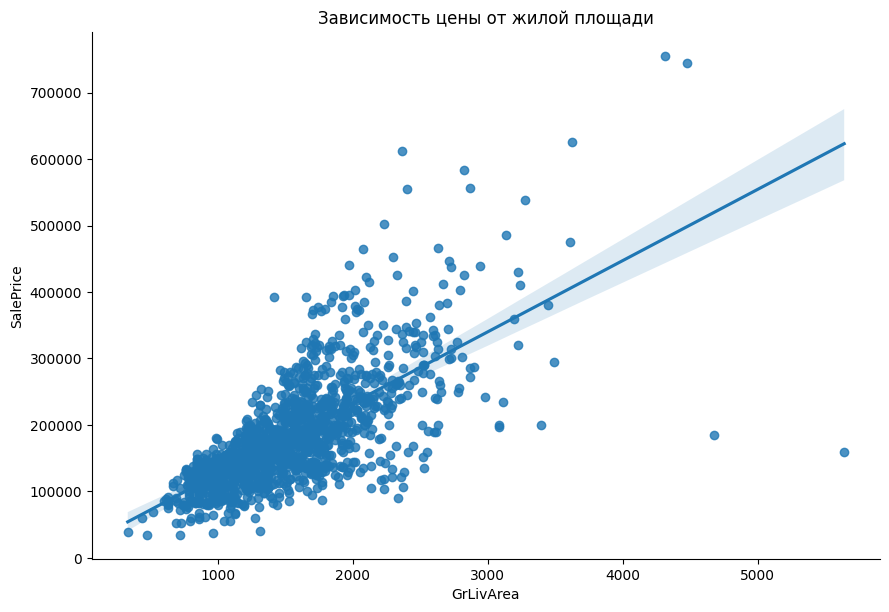

In [16]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=df, height=6, aspect=1.5)
plt.title('Зависимость цены от жилой площади')

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

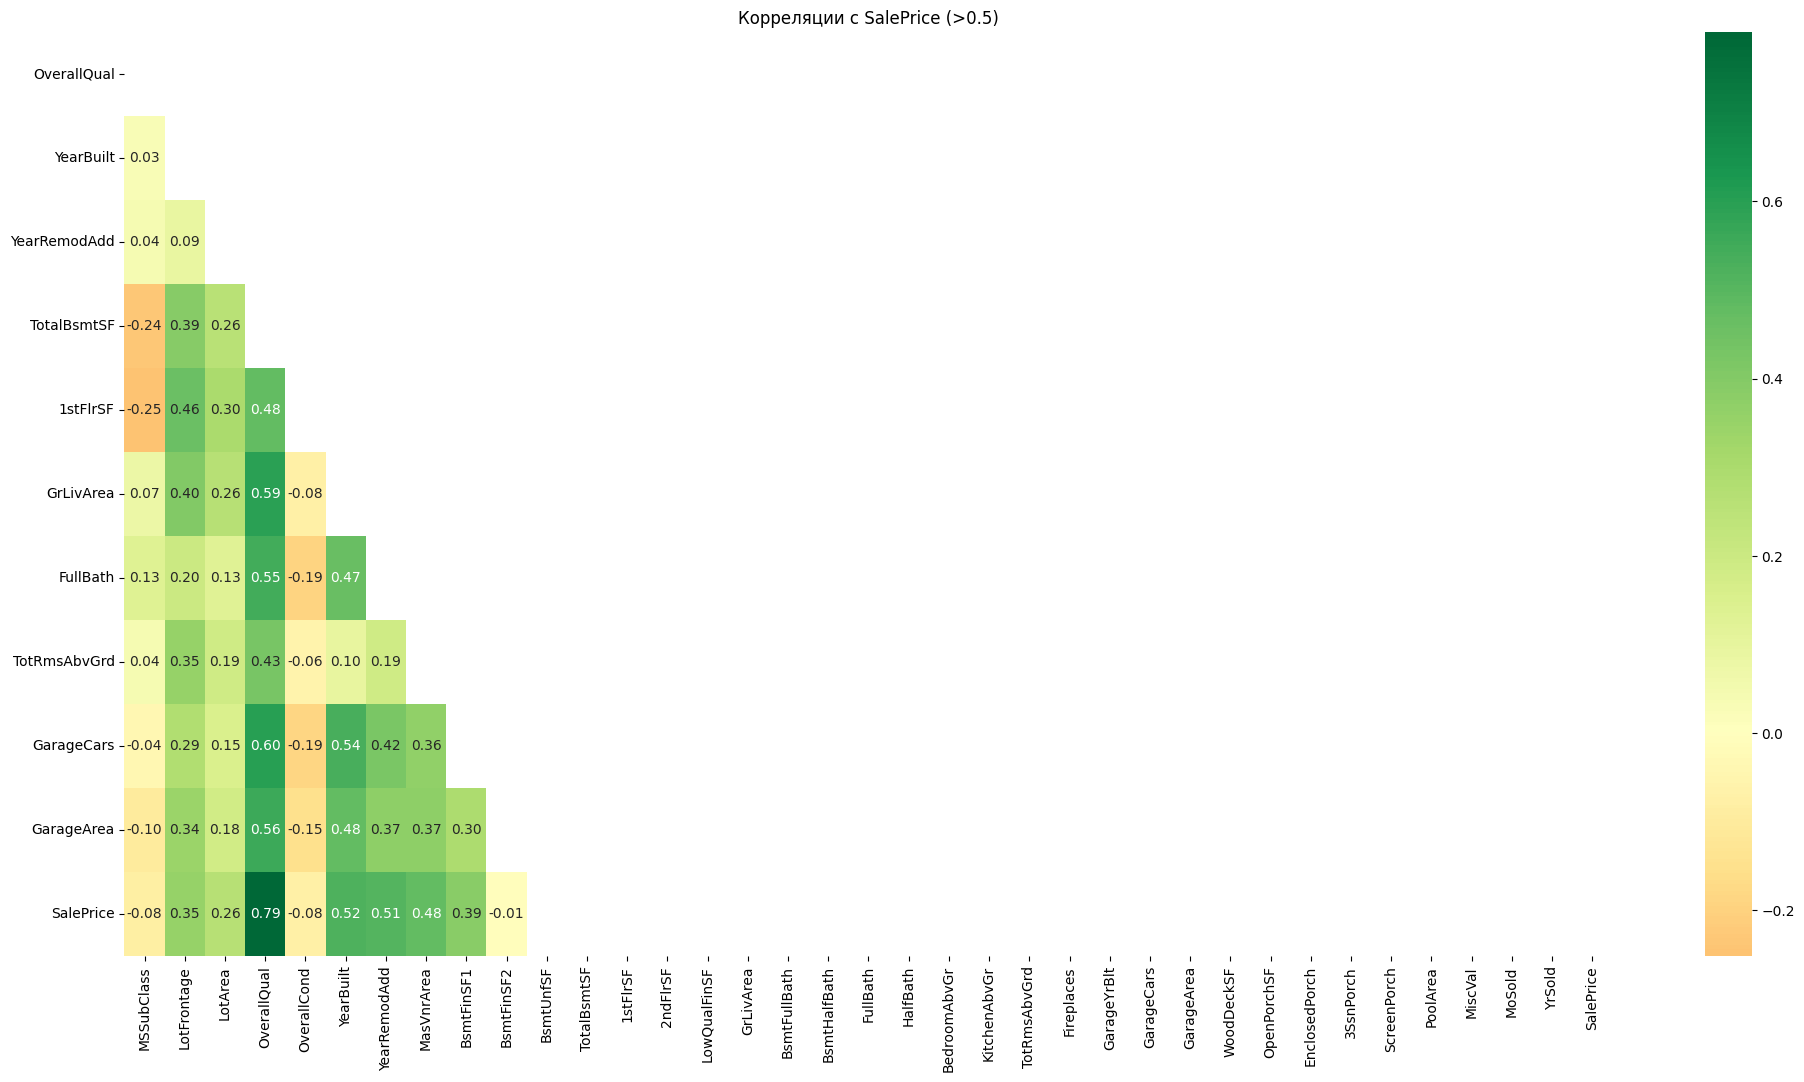

In [17]:
# Вычисляем корреляцию только для числовых столбцов
corr = df.corr(numeric_only=True)

# Фильтруем корреляции, оставляя только те, где абсолютное значение > 0.5
filtered_corr = corr[(corr['SalePrice'].abs() > 0.5) | (corr.index == 'SalePrice')]

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
# Строим Heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(filtered_corr, mask=mask, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title('Корреляции с SalePrice (>0.5)')
plt.show()

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

In [18]:
# Извлекаем корреляции с SalePrice
sale_price_corr = filtered_corr['SalePrice']

# Фильтруем признаки с корреляцией > 0.5
high_corr_features = sale_price_corr[sale_price_corr.abs() > 0.5].index.tolist()

# Удаляем сам SalePrice из списка, если он там есть
high_corr_features = [feature for feature in high_corr_features if feature != 'SalePrice']

# Выводим список высоко коррелированных признаков
print("Высоко коррелированные признаки с SalePrice (>0.5):")
print(high_corr_features)

Высоко коррелированные признаки с SalePrice (>0.5):
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [19]:
missing = df.isnull().sum() / len(df) * 100
missing

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [20]:
cols_to_drop = missing[missing > 10].index
cols_to_drop

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [21]:
df = df.drop(cols_to_drop, axis=1)
# Заполнение пропусков
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

df[cat_cols] = df[cat_cols].fillna('unknown')
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [22]:
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)
print(f"Всего признаков после One-Hot: {df.shape[1]}")
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Всего признаков после One-Hot: 276


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
coefs = pd.Series(model.coef_, index=X.columns).sort_values(key=abs)
for feat, coef in coefs.items():
    print(f"{feat}: {coef:.2f}")

MiscVal: 0.12
LotArea: 0.76
BsmtUnfSF: -1.92
OpenPorchSF: 2.53
EnclosedPorch: 4.41
BsmtFinSF2: 7.02
WoodDeckSF: 13.41
MasVnrArea: 13.43
1stFlrSF: 15.37
BsmtFinSF1: 17.42
GarageArea: 18.38
LowQualFinSF: -19.53
MSSubClass: -19.79
TotalBsmtSF: 22.52
ScreenPorch: 28.59
GarageYrBlt: -30.18
GrLivArea: 31.15
CentralAir_N: -31.17
CentralAir_Y: 31.17
3SsnPorch: 31.41
2ndFlrSF: 35.32
Functional_Mod: 84.63
PoolArea: 85.11
YearRemodAdd: 100.63
GarageFinish_Unf: -129.43
Exterior2nd_Brk Cmn: -135.86
GarageFinish_Fin: -232.59
YearBuilt: 316.05
GarageType_BuiltIn: -321.41
YrSold: -328.28
Exterior2nd_Wd Shng: 399.51
Heating_Grav: -399.90
Neighborhood_Blmngtn: 421.54
LandContour_Bnk: -428.95
MoSold: -446.94
PavedDrive_N: 580.60
BsmtFullBath: 603.67
BsmtFinType1_Unf: 620.33
PavedDrive_Y: 663.74
GarageType_Attchd: 765.14
BsmtFinType1_BLQ: -836.53
HalfBath: 850.27
HeatingQC_Fa: 865.76
BsmtHalfBath: -922.79
Exterior1st_CemntBd: -961.55
Neighborhood_SawyerW: -1000.88
BsmtFinType2_BLQ: -1004.55
LotShape_IR2: 

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя MSE: {-scores.mean():.2f}")

Средняя MSE: 1221254100.98


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [25]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.logspace(0, 3, 100)
coefs_ridge = []
coefs_lasso = []
zero_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X, y)
    coefs_ridge.append(ridge.coef_)
    
    lasso = Lasso(alpha=alpha).fit(X, y)
    coefs_lasso.append(lasso.coef_)
    zero_coefs.append(np.sum(np.abs(lasso.coef_) < 1e-4))

d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.722e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.296e+10, tolerance: 9.208e+08
  mod

Text(0.5, 1.0, 'Lasso: Коэффициенты vs Alpha')

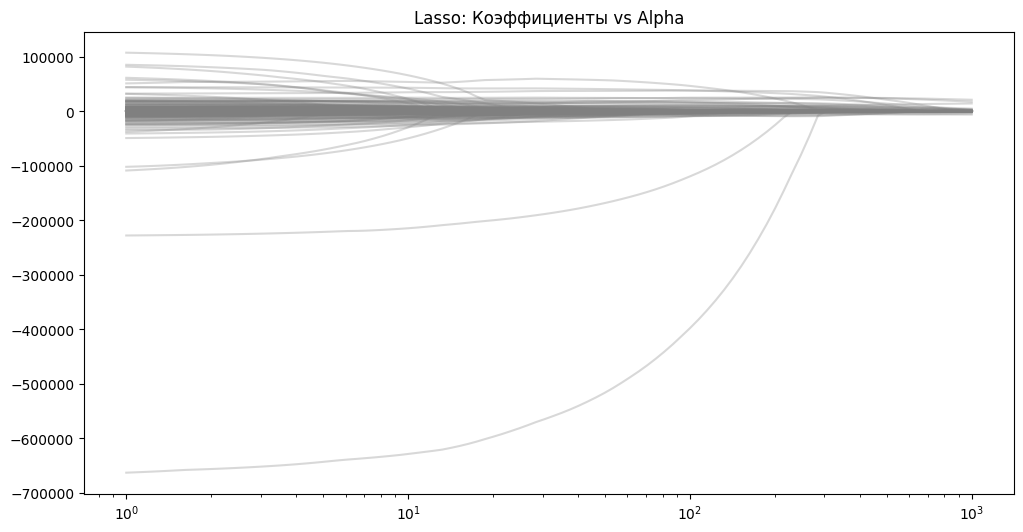

In [26]:
plt.figure(figsize=(12, 6))
for i in range(len(X.columns)):
    plt.plot(alphas, [c[i] for c in coefs_lasso], color='grey', alpha=0.3)
plt.xscale('log')
plt.title('Lasso: Коэффициенты vs Alpha')

Text(0.5, 1.0, 'Количество нулевых коэффициентов (Lasso)')

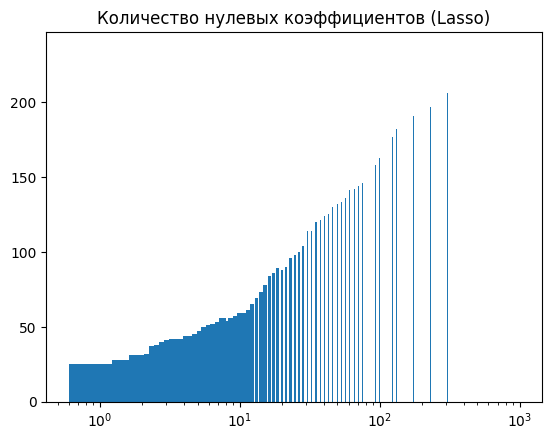

In [27]:
plt.bar(alphas, zero_coefs)
plt.xscale('log')
plt.title('Количество нулевых коэффициентов (Lasso)')

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924599009.0639038, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1934708232.5946045, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2541015304.9365234, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
d:\Programs\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Obje

Оптимальное alpha: 141.75
Ненулевых признаков: 93


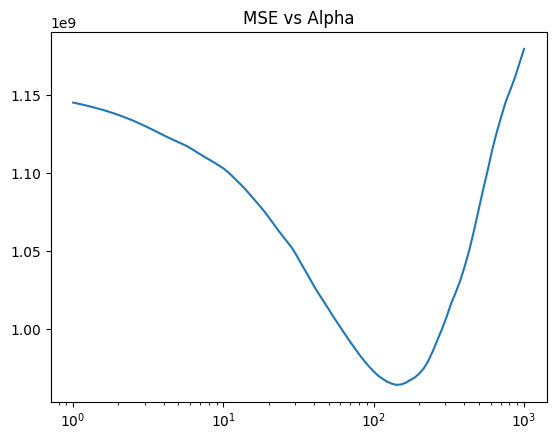

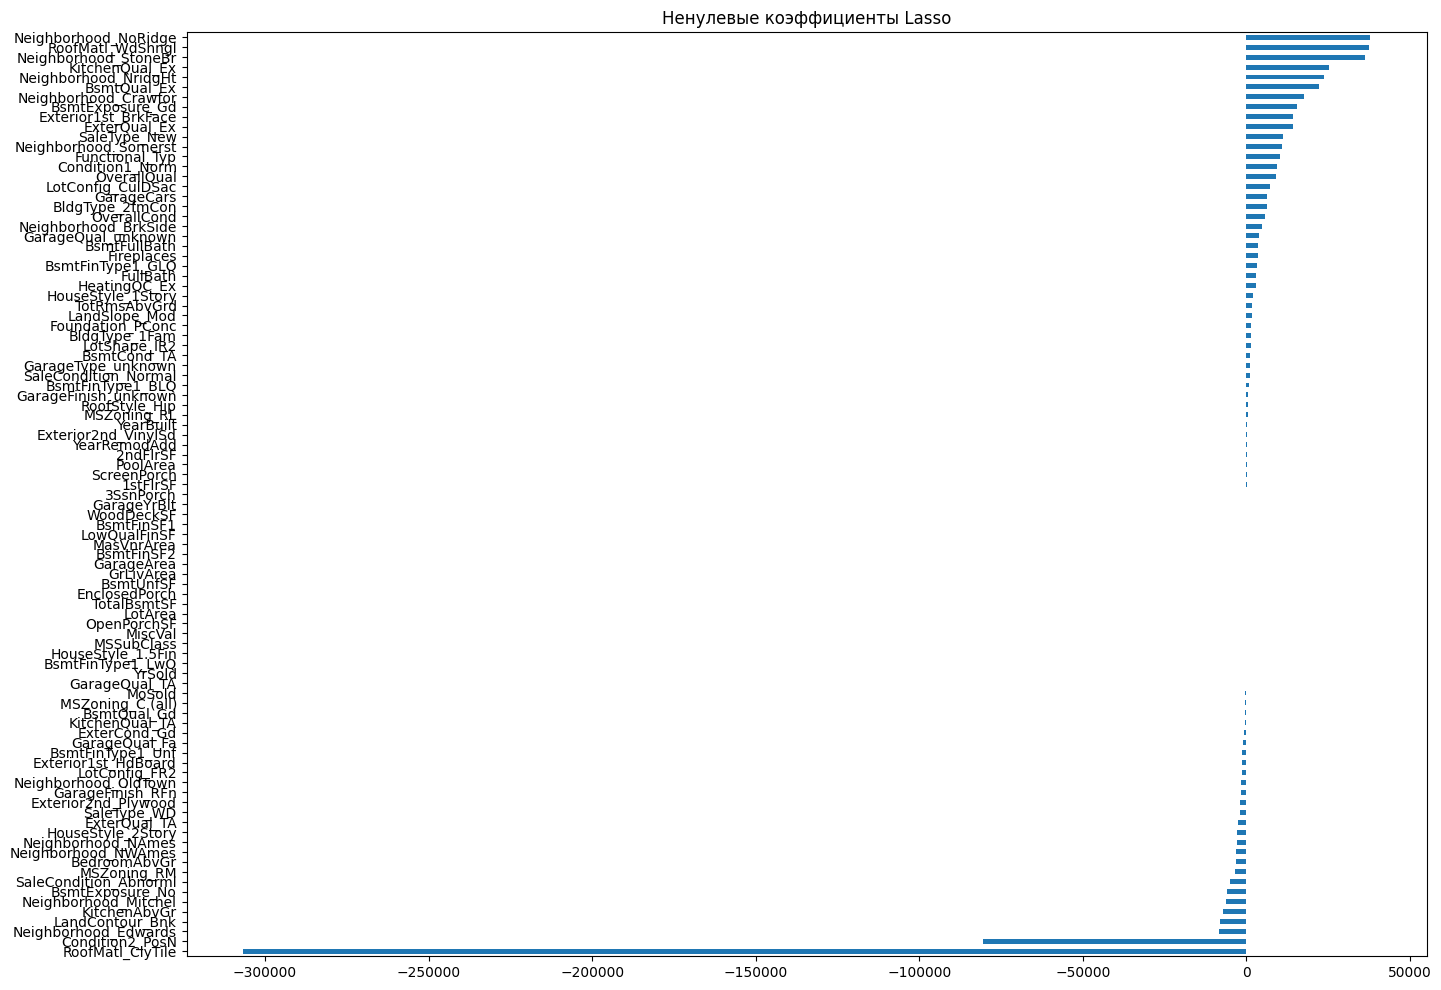

In [28]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5).fit(X, y)
print(f"Оптимальное alpha: {lasso_cv.alpha_:.2f}")

# График MSE
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1))
plt.xscale('log')
plt.title('MSE vs Alpha')

# Гистограмма коэффициентов
non_zero = np.abs(lasso_cv.coef_) > 1e-4
coefs = pd.Series(lasso_cv.coef_[non_zero], index=X.columns[non_zero]).sort_values()
plt.figure(figsize=(16, 12))
coefs.plot.barh()
plt.title('Ненулевые коэффициенты Lasso')

print(f"Ненулевых признаков: {sum(non_zero)}")

## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")


Размерность X_train: (978, 275)
Размерность X_test: (482, 275)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [30]:
model = Lasso(alpha=141.75) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

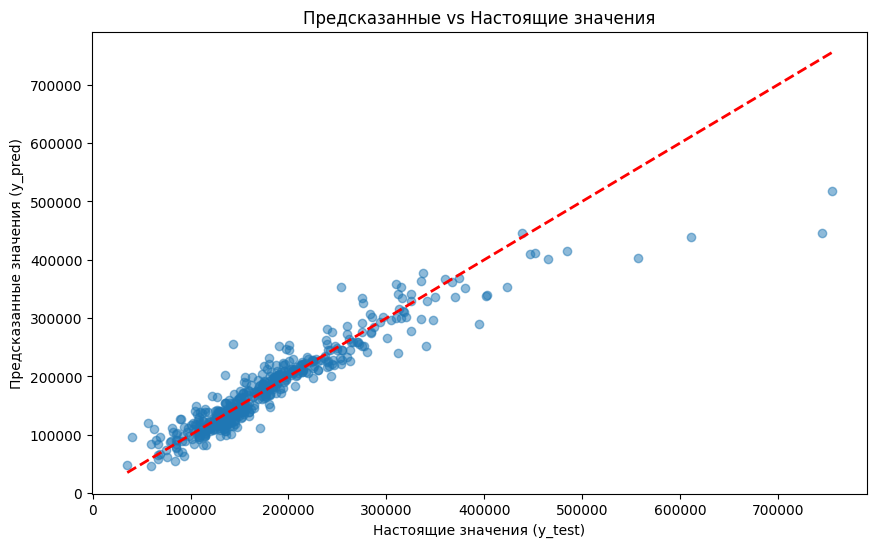

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Настоящие значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Предсказанные vs Настоящие значения')
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [32]:
from sklearn.model_selection import cross_val_score


# Создаем новый X с ограниченными признаками
X_limited = df[high_corr_features]

# Кросс-валидация с Lasso
lasso = Lasso(alpha=1)
scores = cross_val_score(lasso, X_limited, y, cv=5, scoring='neg_mean_squared_error')

# Вывод результатов
print(f"Средняя MSE: {-scores.mean():.2f}")
print(f"Результаты по фолдам: {-scores}")

Средняя MSE: 1529885472.35
Результаты по фолдам: [9.79162472e+08 1.38218500e+09 1.67803085e+09 1.13349068e+09
 2.47655836e+09]


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.